## Step-1 Data loading

In [45]:
! kaggle competitions download -c playground-series-s4e12


  0%|          | 0.00/75.5M [00:00<?, ?B/s]
  1%|▏         | 1.00M/75.5M [00:00<00:40, 1.95MB/s]
  4%|▍         | 3.00M/75.5M [00:00<00:13, 5.63MB/s]
  9%|▉         | 7.00M/75.5M [00:00<00:05, 13.4MB/s]
 16%|█▌        | 12.0M/75.5M [00:00<00:02, 22.2MB/s]
 23%|██▎       | 17.0M/75.5M [00:00<00:02, 29.4MB/s]
 29%|██▉       | 22.0M/75.5M [00:01<00:01, 35.4MB/s]
 36%|███▌      | 27.0M/75.5M [00:01<00:01, 32.2MB/s]
 42%|████▏     | 32.0M/75.5M [00:01<00:01, 36.9MB/s]
 49%|████▉     | 37.0M/75.5M [00:01<00:01, 32.5MB/s]
 56%|█████▌    | 42.0M/75.5M [00:01<00:00, 36.5MB/s]
 62%|██████▏   | 47.0M/75.5M [00:01<00:00, 40.3MB/s]
 69%|██████▉   | 52.0M/75.5M [00:01<00:00, 42.9MB/s]
 76%|███████▌  | 57.0M/75.5M [00:01<00:00, 44.6MB/s]
 83%|████████▎ | 63.0M/75.5M [00:02<00:00, 47.2MB/s]
 90%|█████████ | 68.0M/75.5M [00:02<00:00, 47.4MB/s]
 97%|█████████▋| 73.0M/75.5M [00:02<00:00, 48.2MB/s]
100%|██████████| 75.5M/75.5M [00:02<00:00, 33.2MB/s]


In [46]:
import zipfile
import os

def unzip_file_and_delete(zip_file_path, extract_to):
    """
    Unzips a ZIP file to the specified directory and deletes the ZIP file after successful extraction.

    :param zip_file_path: Path to the ZIP file
    :param extract_to: Directory where files should be extracted
    """
    # Check if the file exists
    if not os.path.exists(zip_file_path):
        print(f"Error: The file '{zip_file_path}' does not exist.")
        return

    # Create the output directory if it doesn't exist
    os.makedirs(extract_to, exist_ok=True)

    # Unzipping the file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Files extracted successfully to '{extract_to}'")

        # Delete the zip file after successful extraction
        os.remove(zip_file_path)
        print(f"ZIP file '{zip_file_path}' has been deleted.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
zip_file_path = 'playground-series-s4e12.zip' 
extract_to = 'Data'  # Directory to extract the files
unzip_file_and_delete(zip_file_path, extract_to)


Files extracted successfully to 'Data'
ZIP file 'playground-series-s4e12.zip' has been deleted.


In [1]:
import pandas as pd

df_train = pd.read_csv('Data/train.csv')

df_test = pd.read_csv('Data/test.csv')

In [2]:
df_train.shape

(1200000, 21)

In [3]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [4]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


### Indentify Target [Output] Feature

In [5]:
# Extract the Target Column
target_column = (set(df_train.columns) - set(df_test.columns)).pop()

print(f"Target column: {target_column}")
print(f"Data type: {df_train[target_column].dtype}")

Target column: Premium Amount
Data type: float64


# Step-2 EDA

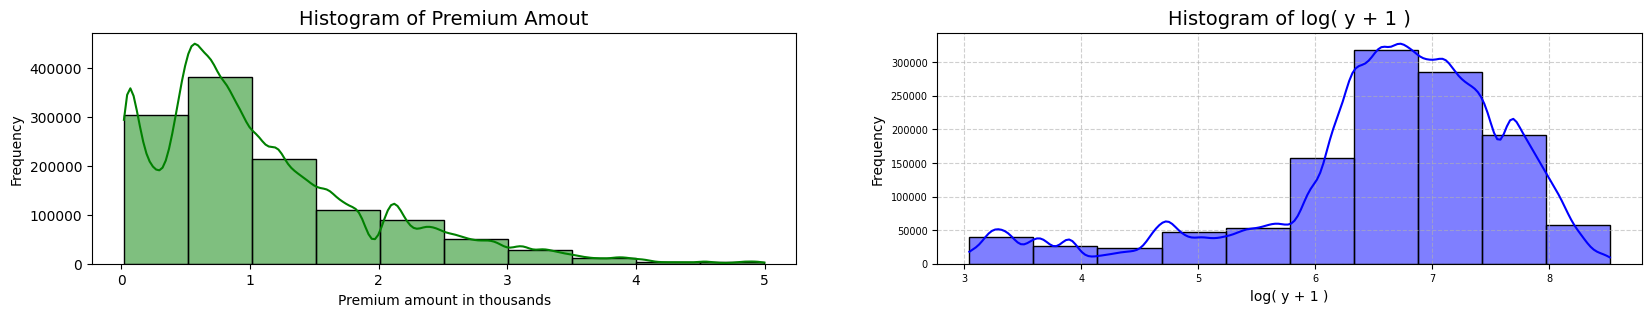

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.histplot(df_train[target_column]/1000,kde=True,bins=10,color='green')
plt.title(f'Histogram of Premium Amout', fontsize=14)
plt.xlabel('Premium amount in thousands')
plt.ylabel('Frequency')

import numpy as np

premium_amount_log = np.log1p(df_train[target_column])

plt.subplot(1, 2, 2)
sns.histplot(premium_amount_log, kde=True, bins=10, color='blue')
plt.title(f'Histogram of log( y + 1 )', fontsize=14)
plt.xlabel(f'log( y + 1 )', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

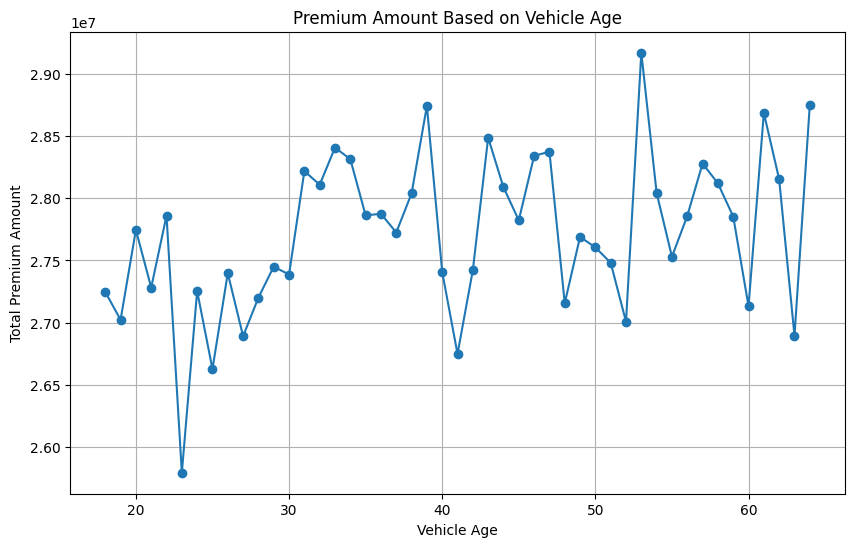

In [9]:
import matplotlib.pyplot as plt

# Grouping and aggregating data
vehicle_age_premium = df_train.groupby('Age')['Premium Amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(vehicle_age_premium.index, vehicle_age_premium.values, marker='o', linestyle='-')

# Adding labels and title
plt.title("Premium Amount Based on Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Total Premium Amount")
plt.grid(True)

# Display the plot
plt.show()


## Training Data

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [11]:
# Retrieve columns with 'object' data type
datetime_columns = df_train.select_dtypes(include=['object']).columns

for col in datetime_columns:
    try:
        # Convert the column to datetime format
        df_train[col] = pd.to_datetime(df_train[col], errors='raise')
        df_test[col] = pd.to_datetime(df_test[col], errors='raise')
        
        # Convert datetime to epoch time
        df_train[col] = df_train[col].astype(np.int64) / 10**9
        df_test[col] = df_test[col].astype(np.int64) / 10**9

        print(f"Converted '{col}' to epoch time.")
    except Exception:
        continue

C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\24361

Converted 'Policy Start Date' to epoch time.


C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\2436155646.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='raise')
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\24361

In [12]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,1.703345e+09,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,1.686583e+09,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,1.696087e+09,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,1.718206e+09,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,1.638372e+09,Poor,Yes,Weekly,House,2022.0


In [13]:
df_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,1.685892e+09,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,1.713799e+09,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,1.680708e+09,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,1.698247e+09,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,1.637940e+09,Average,No,Weekly,House


In [14]:
df_train['premium_amount_log'] = premium_amount_log 

## Handling missing values

In [15]:
# Fill missing values in numeric columns
numeric_columns = df_train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in df_test.columns:
        median_value = df_train[col].median()  # Calculate the median
        df_train[col].fillna(median_value, inplace=True)
        df_test[col].fillna(median_value, inplace=True)

# Fill missing values in object columns
object_columns = df_train.select_dtypes(include=['object']).columns
for col in object_columns:
    if col in df_test.columns:
        df_train[col].fillna("Unknown", inplace=True)
        df_test[col].fillna("Unknown", inplace=True)

C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\1767865124.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_value, inplace=True)
C:\Users\amey9\AppData\Local\Temp\ipykernel_34140\1767865124.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [44]:
df_train.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
premium_amount_log      0
Claim ratio             0
dtype: int64

In [17]:
df_test.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

In [48]:
def safe_divide(duration, claims):
    try:
        return duration / claims if claims != 0 else np.nan
    except ZeroDivisionError:
        return np.nan

df_train['Claim ratio'] = df_train.apply(
    lambda row: safe_divide(row['Insurance Duration'], row['Previous Claims']), axis=1
)


In [49]:
df_train['Claim ratio'].value_counts()

Claim ratio
1.000000    99890
2.000000    97796
3.000000    96858
4.000000    91948
9.000000    76737
8.000000    74268
7.000000    74104
6.000000    73318
5.000000    73068
1.500000    19848
0.500000    19809
4.500000    19059
3.500000    18791
2.500000    18500
0.333333     5576
2.666667     5575
2.333333     5500
1.666667     5371
1.333333     5328
0.666667     5299
1.750000     1240
0.250000     1196
0.750000     1190
2.250000     1180
1.250000     1174
1.200000      246
1.600000      237
1.400000      226
0.400000      221
0.200000      217
0.600000      212
1.800000      211
0.800000      205
0.166667       40
0.833333       39
1.166667       34
0.714286       11
1.285714        8
0.142857        7
0.857143        6
0.428571        5
0.285714        4
1.142857        4
0.375000        4
0.571429        4
1.125000        1
0.125000        1
0.625000        1
Name: count, dtype: int64

# Step-3 Data pre-processing

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = df_train.select_dtypes(include=['object']).columns
print(object_columns)
for column_name in object_columns:
    df_train[column_name] = le.fit_transform(df_train[column_name])    
    df_test[column_name] = le.transform(df_test[column_name])
    

print(df_train.dtypes)
print(df_test.dtypes)

Index([], dtype='object')
id                        int64
Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level           int64
Occupation                int64
Health Score            float64
Location                  int64
Policy Type               int64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback         int64
Smoking Status            int64
Exercise Frequency        int64
Property Type             int64
Premium Amount          float64
premium_amount_log      float64
Claim ratio             float64
dtype: object
id                        int64
Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level           int64


In [39]:
df_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,0,2310.0,3,4.0,0,1,7.657981,0,0,1.0,19.0,595.0,1.0,1.685892e+09,2,1,3,2
1,1200001,31.0,0,126031.0,1,2.0,2,1,13.381379,1,2,1.0,14.0,372.0,8.0,1.713799e+09,1,1,2,0
2,1200002,47.0,0,17092.0,0,0.0,3,2,24.354527,2,1,1.0,16.0,819.0,9.0,1.680708e+09,0,1,1,1
3,1200003,28.0,0,30424.0,0,3.0,3,1,5.136225,1,1,1.0,3.0,770.0,5.0,1.698247e+09,2,1,0,2
4,1200004,24.0,1,10863.0,0,2.0,1,2,11.844155,1,2,1.0,14.0,755.0,7.0,1.637940e+09,0,0,3,2


### Dataset Normalization

In [40]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = df_train.select_dtypes(include=['float64']).columns
numerical_columns = numerical_columns[numerical_columns != target_column]

# Applying Normalization
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

ValueError: Input X contains infinity or a value too large for dtype('float64').

IndexError: index 20 is out of bounds for axis 0 with size 20

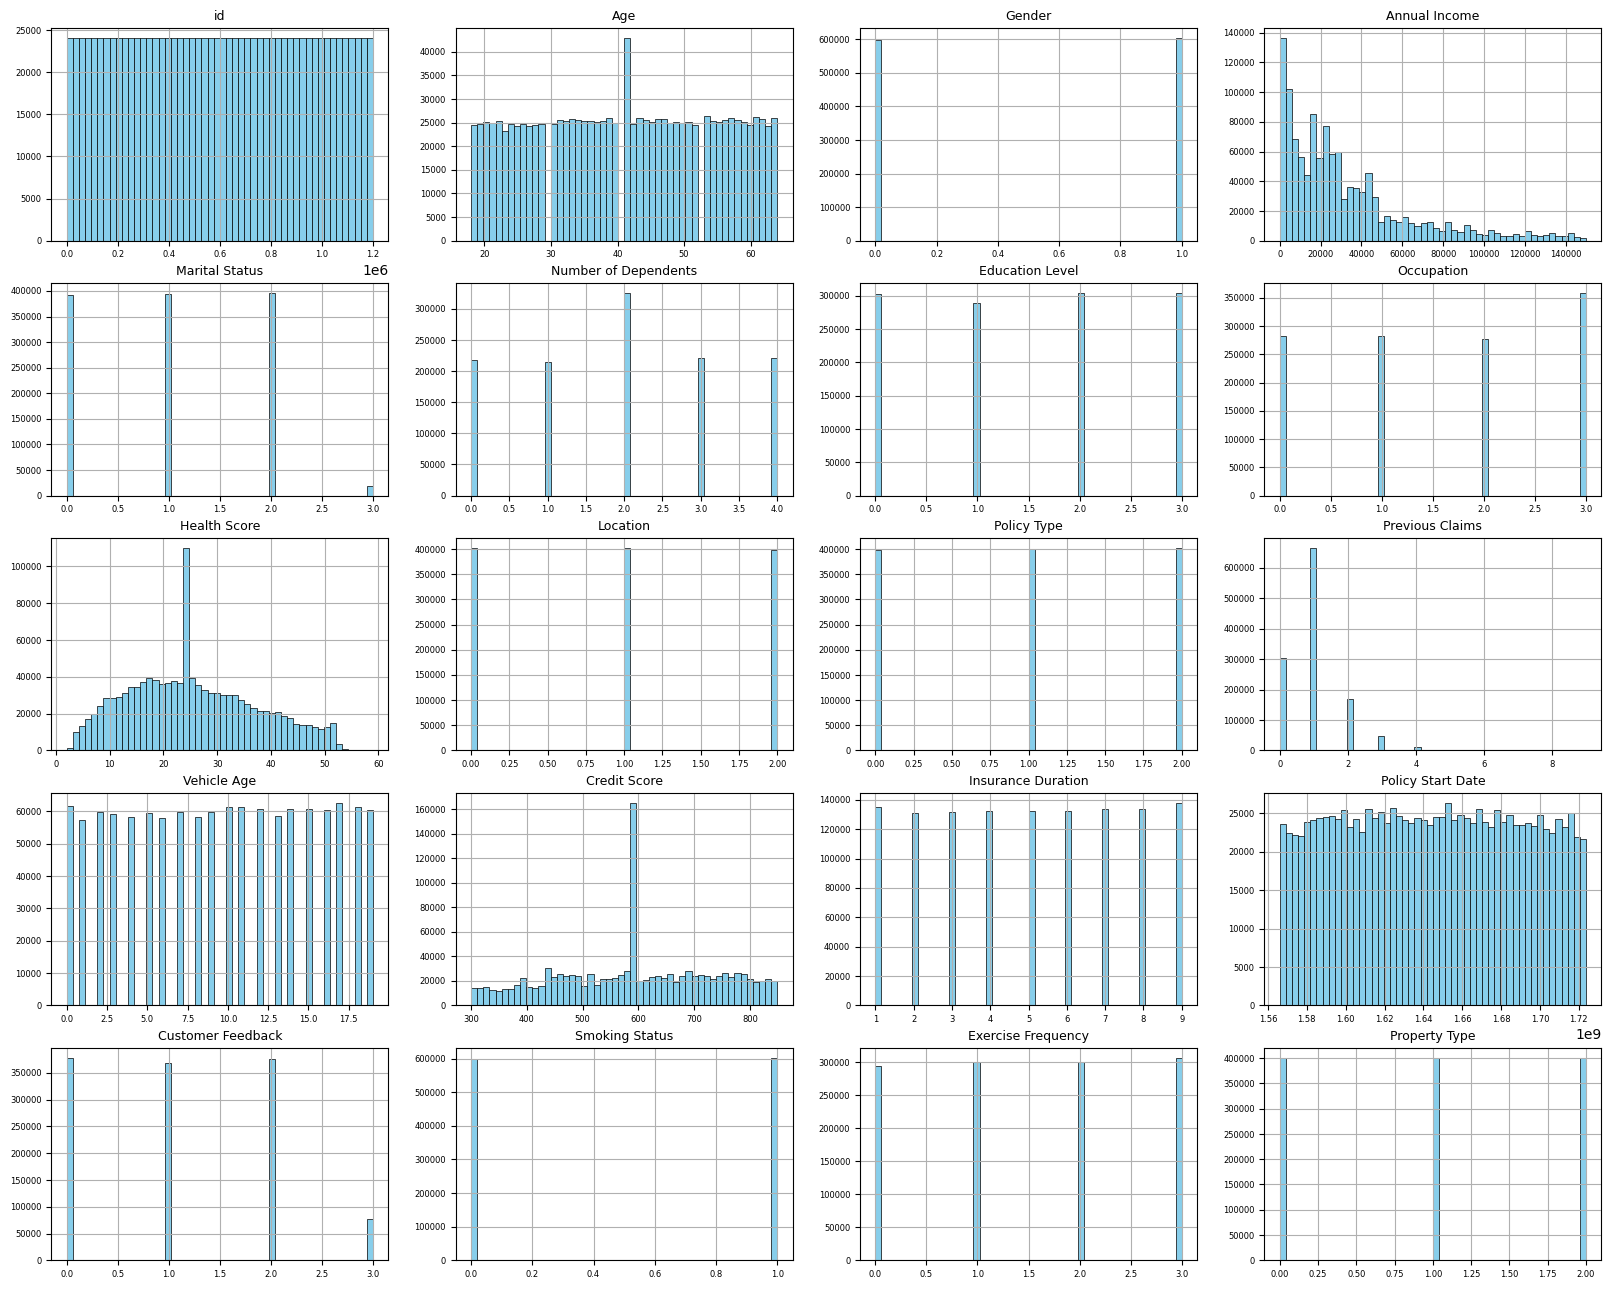

In [23]:
# Dataset Feature Distributions (train)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16))
columns_to_plot = df_train.columns
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    df_train[column].hist(ax=ax, bins=50, color='skyblue', edgecolor='black', linewidth=0.5)
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Dataset Feature Distributions (train)', fontsize=11)
plt.tight_layout()
plt.show()

In [50]:
df_train.corr()['Premium Amount']

id                     -0.000292
Age                    -0.002410
Gender                  0.000161
Annual Income          -0.009989
Marital Status          0.005356
Number of Dependents   -0.000947
Education Level        -0.001121
Occupation             -0.006059
Health Score            0.013976
Location                0.001059
Policy Type            -0.000884
Previous Claims         0.039394
Vehicle Age             0.000391
Credit Score           -0.024471
Insurance Duration     -0.000028
Policy Start Date      -0.010111
Customer Feedback       0.015772
Smoking Status          0.000163
Exercise Frequency     -0.001098
Property Type          -0.001222
Premium Amount          1.000000
premium_amount_log      0.820760
Claim ratio            -0.023534
Name: Premium Amount, dtype: float64

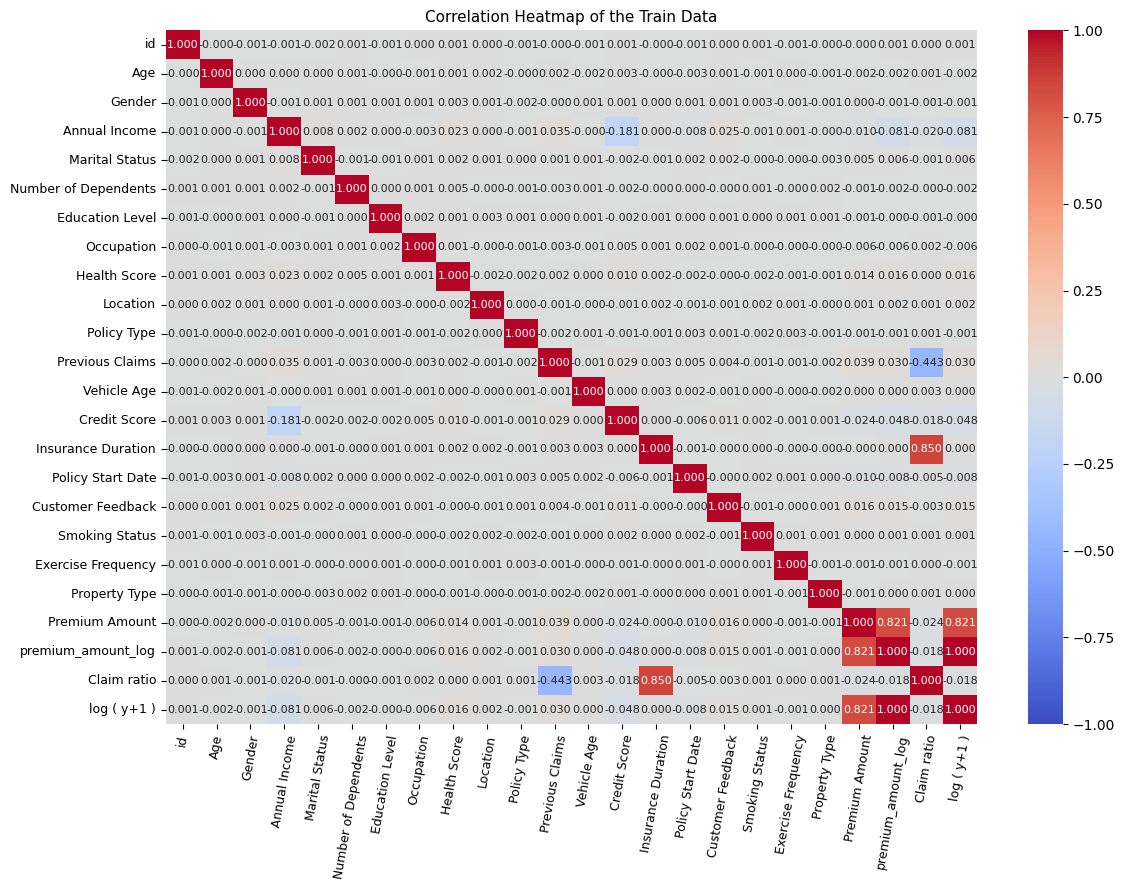

In [51]:
# Select only numeric columns from the training data
numeric_data = df_train.select_dtypes(include=['number'])

# Add a new column for the log(y+1)
numeric_data['log ( y+1 )'] = np.log1p(df_train[target_column])

# Create the heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1,
                      annot_kws={"size": 8}, fmt=".3f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=80, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Correlation Heatmap of the Train Data", fontsize=11)
plt.tight_layout()
plt.show()

In [52]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'premium_amount_log', 'Claim ratio'],
      dtype='object')

In [53]:
X = df_train[['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Claim ratio']]
y = df_train['Premium Amount']
y = np.log1p(y)

In [54]:
X.shape

(1200000, 20)

In [55]:
y.shape

(1200000,)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (960000, 20)
X_test shape: (240000, 20)
y_train shape: (960000,)
y_test shape: (240000,)


In [57]:
! pip install xgboost scikit-optimize

In [58]:
import numpy as np
import pandas as pd

# Assuming `X` is your feature matrix
print("Checking for NaN values:")
print(np.isnan(X).sum())

print("Checking for infinity values:")
print(np.isinf(X).sum())


Checking for NaN values:
Age                          0
Gender                       0
Annual Income                0
Marital Status               0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Policy Start Date            0
Customer Feedback            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Claim ratio             305433
dtype: int64
Checking for infinity values:
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0


In [59]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV

# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42, n_jobs = -1)

# Hyperparameters for BayesSearchCV tuning
search_spaces = {
    'n_estimators': (10, 200),      
    'max_depth': (3, 10),            
    'reg_alpha': (0.001, 0.2, 'log-uniform'),  
    'reg_lambda': (0.1, 100, 'log-uniform'), 
    'learning_rate': (0.1, 0.001, 0.01)
}

# Set up BayesSearchCV for hyperparameter tuning
search = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,          # Number of iterations for optimization
    cv=5,               # k-fold cross-validation
    verbose=1,          # Display detailed logs
    scoring="neg_root_mean_squared_error",


)

# Perform the Bayesian optimization with cross-validation
search.fit(X_train, y_train)

print("Best params: ", search.best_params_)
print("Best RMSLE: ", -search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [62]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV

# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42, n_jobs = -1,eval_metric="rmsle")

# Hyperparameters for BayesSearchCV tuning
search_spaces = {
    'n_estimators': (50,51,52,54,55,60),      
    'max_depth': (7,8,9),            
    'reg_alpha': (0.001,0.01),  
    'reg_lambda': (50, 100), 
    'learning_rate': (0.1, 0.09, 0.12, 0.08,0.13),
    'booster':('gblinear','dart','gbtree')
}

# Set up BayesSearchCV for hyperparameter tuning
search = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,          # Number of iterations for optimization
    cv=5,               # k-fold cross-validation
    verbose=1,          # Display detailed logs
    scoring="neg_root_mean_squared_error",


)

# Perform the Bayesian optimization with cross-validation
search.fit(X_train, y_train)

print("Best params: ", search.best_params_)
print("Best RMSLE: ", -search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:48:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:48:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:59:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:00:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:00:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:00:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.w

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params:  OrderedDict([('booster', 'gbtree'), ('learning_rate', 0.12), ('max_depth', 8), ('n_estimators', 60), ('reg_alpha', 0.001), ('reg_lambda', 100)])
Best RMSLE:  1.0469414434959892


In [63]:
from xgboost import XGBRegressor

model = XGBRegressor(n_jobs = -1,
                     eval_metric="rmsle",
                     n_estimators=60,
                     learning_rate=0.12,
                     max_depth=8,
                     random_state=42,
                     reg_lambda = 100,
                     reg_alpha = 0.001,
                     booster = "gbtree"

)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [64]:
y_pred = model.predict(X_test)

In [65]:
model.intercept_

array([6.593848], dtype=float32)

In [66]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [67]:
print(f"MSE:{round(mse,2)},\nMAE:{round(mae,2)},\nRMSE:{round(rmse,2)}")

MSE:1.1,
MAE:0.74,
RMSE:1.05


In [68]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [69]:
score

0.08686126165711994

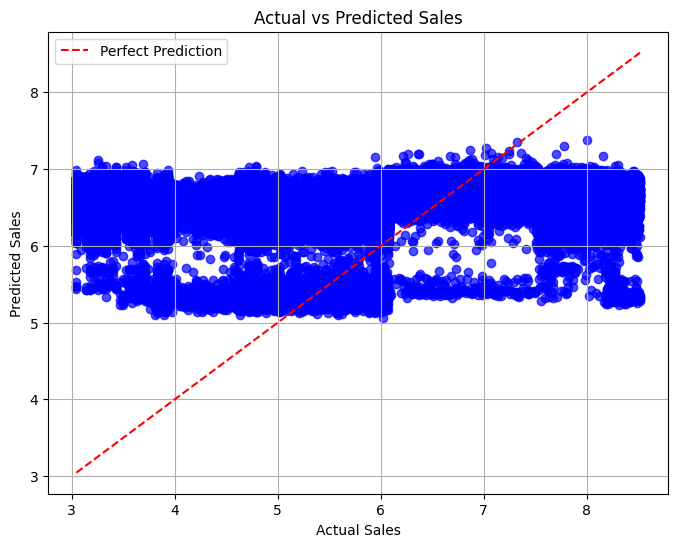

In [70]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSLE: 0.15858888061498566


In [74]:
def safe_divide(duration, claims):
    try:
        return duration / claims if claims != 0 else np.nan
    except ZeroDivisionError:
        return np.nan

df_test['Claim ratio'] = df_test.apply(
    lambda row: safe_divide(row['Insurance Duration'], row['Previous Claims']), axis=1
)

In [75]:
check = df_test[[ 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type','Claim ratio']]

In [76]:
check

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Claim ratio
0,28.0,0,2310.0,3,4.0,0,1,7.657981,0,0,1.0,19.0,595.0,1.0,1.685892e+09,2,1,3,2,1.0
1,31.0,0,126031.0,1,2.0,2,1,13.381379,1,2,1.0,14.0,372.0,8.0,1.713799e+09,1,1,2,0,8.0
2,47.0,0,17092.0,0,0.0,3,2,24.354527,2,1,1.0,16.0,819.0,9.0,1.680708e+09,0,1,1,1,9.0
3,28.0,0,30424.0,0,3.0,3,1,5.136225,1,1,1.0,3.0,770.0,5.0,1.698247e+09,2,1,0,2,5.0
4,24.0,1,10863.0,0,2.0,1,2,11.844155,1,2,1.0,14.0,755.0,7.0,1.637940e+09,0,0,3,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,0,38782.0,1,1.0,0,3,14.498639,0,2,1.0,8.0,309.0,2.0,1.625844e+09,0,1,0,1,2.0
799996,41.0,0,73462.0,2,0.0,2,3,8.145748,0,0,2.0,0.0,595.0,2.0,1.680017e+09,1,0,0,0,1.0
799997,26.0,0,35178.0,2,0.0,2,0,6.636583,2,1,1.0,10.0,595.0,6.0,1.569857e+09,2,0,1,0,6.0
799998,34.0,0,45661.0,2,3.0,2,3,15.937248,2,2,2.0,17.0,467.0,7.0,1.652110e+09,0,0,3,1,3.5


In [77]:
from sklearn.preprocessing import LabelEncoder


# Select columns with object data type
object_columns = check.select_dtypes(include=['object']).columns

# Apply Label Encoding to object columns
label_encoders = {}  # Store label encoders for each column
for col in object_columns:
    le = LabelEncoder()
    check[col] = le.fit_transform(check[col])  # Transform the column
    label_encoders[col] = le            # Save the encoder for future use

print(check)

         Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0       28.0       0         2310.0               3                   4.0   
1       31.0       0       126031.0               1                   2.0   
2       47.0       0        17092.0               0                   0.0   
3       28.0       0        30424.0               0                   3.0   
4       24.0       1        10863.0               0                   2.0   
...      ...     ...            ...             ...                   ...   
799995  50.0       0        38782.0               1                   1.0   
799996  41.0       0        73462.0               2                   0.0   
799997  26.0       0        35178.0               2                   0.0   
799998  34.0       0        45661.0               2                   3.0   
799999  25.0       1        24843.0               0                   3.0   

        Education Level  Occupation  Health Score  Location  Policy Type  \

In [78]:
y_pred_2 = model.predict(check)
y_pred_2 = np.expm1(y_pred_2)

In [79]:
y_pred_2.shape

(800000,)

In [80]:
import pandas as pd

ids = df_test['id']

# Assuming y_pred contains the predictions
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame({'id': ids,'Premium Amount': y_pred_2})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv
